# **CSgo Project**

**Counter-Strike (CS)** is a popular series of tactical first-person shooter (FPS) video games that have been enjoyed by gamers worldwide for many years. The series originated as a modification for the popular game Half-Life and quickly gained its own dedicated following. Here's an overview of Counter-Strike:

**Gameplay Overview:**

Counter-Strike is primarily a multiplayer game where two teams, the Counter-Terrorists (CTs) and the Terrorists (Ts), compete against each other.

The objective of each round varies based on the game mode, but the primary goals include:

**Counter-Terrorists:** Prevent the Terrorists from achieving their objectives, such as defusing a bomb or rescuing hostages.

**Terrorists:** Achieve their objectives, which may include planting a bomb at a designated site or holding hostages.
Rounds are relatively short, typically lasting a few minutes, and players have only one life per round. When a player is eliminated, they must wait until the next round to respawn.

**Key Features:**

**Weapons:** Players can purchase and use a wide variety of firearms, grenades, and equipment. The choice of weaponry is an essential strategic element in the game.

**Economy:** Players earn in-game money based on their performance in the previous rounds. Money is used to buy weapons and equipment for the next round.

**Maps:** Counter-Strike features a range of maps, each with its own layout and objectives. Popular maps include Dust II, Mirage, Inferno, and more.

**Teamwork:** Successful gameplay in Counter-Strike heavily relies on teamwork, communication, and strategy. Players often coordinate their actions with their teammates to achieve objectives.

**Competitive Play:** Counter-Strike is well-known for its competitive scene, with professional esports tournaments held worldwide.

**Popular Game Modes:**

**Bomb Defusal (de_):** In this mode, Terrorists attempt to plant a bomb at one of the designated bomb sites, while Counter-Terrorists aim to prevent the bomb from being planted or defuse it if it's planted.

**Hostage Rescue (cs_):** In hostage rescue mode, Counter-Terrorists must rescue hostages held by the Terrorists, while the Terrorists aim to prevent the rescues.

**Arms Race:** A fast-paced mode where players cycle through a series of weapons, aiming to be the first to get a kill with each weapon.

**Deathmatch:** A mode where players respawn quickly and aim to get as many kills as possible within a set time limit.

**Wingman:** A 2v2 competitive mode with smaller maps and shorter rounds.

Counter-Strike has evolved over the years with different versions, including Counter-Strike 1.6, Counter-Strike: Source, and Counter-Strike: Global Offensive (CS:GO), which is the most recent and widely played installment as of my last knowledge update in September 2021.

CS:GO is known for its competitive gameplay, professional esports scene, and ongoing updates that have kept the game relevant and enjoyable for players worldwide. It remains a cornerstone of the first-person shooter genre.



**Problem Statement: Build an ML model to predict the Each round's winner Based on every round's stats.**

In [1]:
# Import the rewuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Import the required dataset
df_csgo = pd.read_csv(r'D:\Intellipaat\Datasets\Counter_strike_round.csv')
df_csgo

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


### Exploratory Data Analysis

In [3]:
# Information of data
df_csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [4]:
# Check for the null values in df
df_csgo.isna().sum().sum()

0

In [5]:
# Check for the duplicates in df
df_csgo.duplicated().sum()

4962

In [6]:
# Drop the duplicate records
df_csgo.drop_duplicates(inplace=True)

Now, This is game data so the values can be average, extreme high, very low, etc depending on player's performance, luck, in rounds. 

so there will be some rounds extremely different than some others, and this is common in games

So there is no need of finding/ removing outliers.

In [7]:
# Label encoding
le = LabelEncoder()

df_csgo['map'] = le.fit_transform(df_csgo['map'])
df_csgo['bomb_planted'] = le.fit_transform(df_csgo['bomb_planted'])
df_csgo['round_winner'] = le.fit_transform(df_csgo['round_winner'])

In [8]:
# Check the output target values are balanced or not 
df_csgo['round_winner'].value_counts()

round_winner
1    59941
0    57507
Name: count, dtype: int64

The data is well balanced

In [9]:
# Create independent & dependent variable
X = df_csgo.drop(columns=['round_winner'])
y = df_csgo['round_winner']

In [10]:
# Standardize the data 
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.50968479, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 1.15326858, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 0.02596377, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       ...,
       [ 0.38106478,  0.88093134,  1.69091536, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [ 0.00529651,  0.88093134,  1.69091536, ...,  1.56360029,
        -0.16321956, -0.15480545],
       [-0.37047176,  0.88093134,  1.69091536, ...,  0.9653798 ,
        -0.16321956, -0.15480545]])

### Feature selection with LDA

In [11]:
# Instance of lda class
LDA = LinearDiscriminantAnalysis(n_components=1)

In [12]:
# Fit the data
lda_x = LDA.fit_transform(X_scaled, y)

In [13]:
# Data transformation using lda
lda_x

array([[ 0.1690217 ],
       [-0.25328264],
       [-0.37353115],
       ...,
       [ 0.27680171],
       [ 0.53840813],
       [ 1.31611237]])

In [14]:
# Shape of transformed data
lda_x.shape

(117448, 1)

## LDA Coefficients

Coefficients and Feature Importance in LDA

**Role of Coefficients:-** <br/>
In LDA, the coefficients of the linear discriminants represent how each feature contributes to distinguishing between classes. Essentially, they tell you how much each feature influences the decision boundary between classes.

**Magnitude of Coefficients:-** <br/>
Features with larger absolute values of coefficients are generally more important for the classification task. This is because a larger coefficient value means that the feature has a stronger impact on the projection direction that maximizes class separability.

**Direction of Coefficients:-** <br/>
The sign of the coefficient (positive or negative) indicates the direction of the influence of the feature. For example, a positive coefficient for a feature means that higher values of that feature will push the projection towards one class, whereas a negative coefficient means the opposite.

In [15]:
LDA.coef_

array([[ 1.42085107e-01, -1.76219946e-02,  1.44486071e-02,
        -8.60506286e-02,  2.47130943e-01, -4.52567544e-01,
         3.29982924e-01, -6.05056813e-01,  6.36072745e-01,
        -2.09913706e-01,  1.64604826e-01,  2.47758411e-02,
         8.17702396e-02, -3.59129346e-02, -2.07855793e-01,
         3.84028898e-01, -1.86948537e-01,  6.11234173e-01,
        -1.98857061e-01,  3.74942705e-02, -3.04270371e-01,
         2.48465497e-01, -3.22582338e-16, -1.81909613e-03,
         1.65604645e-02, -6.49693007e-03, -4.53018504e-03,
         1.53116286e-02, -1.35982810e-01,  4.51639915e-02,
         1.22552301e-15,  2.03487944e-02, -4.91445564e-02,
         1.37683454e-01,  2.36155447e-02, -1.76086108e-01,
         1.02057680e-02, -4.98629106e-16, -9.38422784e-02,
         4.50521297e-02, -4.55252271e-01,  1.05865587e-01,
        -1.04790022e-02,  1.10199520e-01, -1.63913029e-02,
         7.02271132e-03, -1.32347293e-02,  3.53867987e-02,
         6.48328192e-03, -6.29293877e-03, -1.14826067e-0

In [16]:
LDA.coef_.shape

(1, 96)

In [17]:
# we only consider magnitude
abs(LDA.coef_)   

array([[1.42085107e-01, 1.76219946e-02, 1.44486071e-02, 8.60506286e-02,
        2.47130943e-01, 4.52567544e-01, 3.29982924e-01, 6.05056813e-01,
        6.36072745e-01, 2.09913706e-01, 1.64604826e-01, 2.47758411e-02,
        8.17702396e-02, 3.59129346e-02, 2.07855793e-01, 3.84028898e-01,
        1.86948537e-01, 6.11234173e-01, 1.98857061e-01, 3.74942705e-02,
        3.04270371e-01, 2.48465497e-01, 3.22582338e-16, 1.81909613e-03,
        1.65604645e-02, 6.49693007e-03, 4.53018504e-03, 1.53116286e-02,
        1.35982810e-01, 4.51639915e-02, 1.22552301e-15, 2.03487944e-02,
        4.91445564e-02, 1.37683454e-01, 2.36155447e-02, 1.76086108e-01,
        1.02057680e-02, 4.98629106e-16, 9.38422784e-02, 4.50521297e-02,
        4.55252271e-01, 1.05865587e-01, 1.04790022e-02, 1.10199520e-01,
        1.63913029e-02, 7.02271132e-03, 1.32347293e-02, 3.53867987e-02,
        6.48328192e-03, 6.29293877e-03, 1.14826067e-01, 3.57336061e-02,
        4.07432147e-16, 6.93751430e-03, 1.54867822e-02, 1.370376

In [18]:
# Perform exponential of coefficient and then convert the 2d array to 1d array
lda_coefficients=np.exp(abs(LDA.coef_)).flatten()                   # np.exp for exponential
                                                                    # .flatten for converting 2d arrat to 1d array

In [19]:
# See the fianl coefficients
lda_coefficients

array([1.15267474, 1.01777818, 1.01455349, 1.08986151, 1.28034675,
       1.57234407, 1.39094438, 1.83135625, 1.88904752, 1.23357161,
       1.17892715, 1.02508531, 1.08520644, 1.03656559, 1.23103563,
       1.46818787, 1.20556524, 1.84270421, 1.22000757, 1.03820605,
       1.35563553, 1.28205659, 1.        , 1.00182075, 1.01669835,
       1.00651808, 1.00454046, 1.01542945, 1.1456622 , 1.04619941,
       1.        , 1.02055724, 1.05037218, 1.14761222, 1.0238966 ,
       1.19254074, 1.01025802, 1.        , 1.09838649, 1.04608239,
       1.57657106, 1.11167244, 1.0105341 , 1.11650081, 1.01652638,
       1.00704743, 1.0133227 , 1.03602036, 1.00650434, 1.00631278,
       1.12167832, 1.03637972, 1.        , 1.00696163, 1.01560732,
       1.01379809, 1.02292652, 1.01815506, 1.        , 1.00602516,
       1.        , 1.01454856, 1.00582189, 1.01100567, 1.22977851,
       1.74564164, 1.08742719, 1.02776903, 1.04814473, 1.09481271,
       1.01743839, 1.00072568, 1.02759341, 1.01792206, 1.03981

In [20]:
X.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

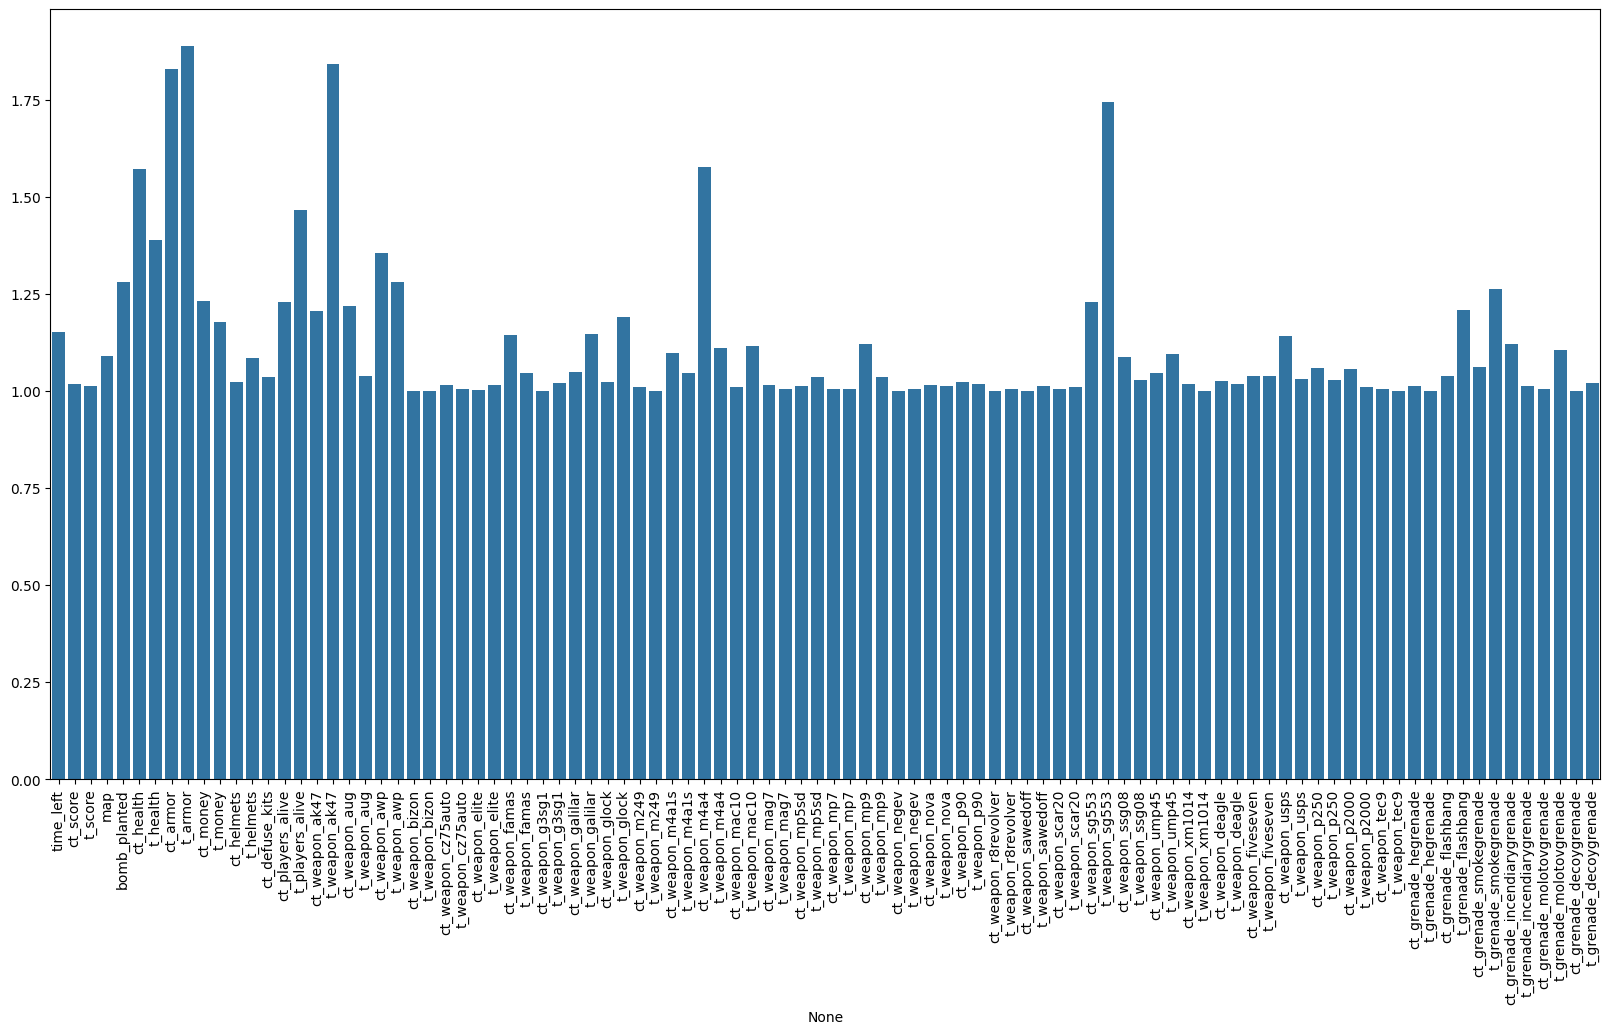

In [21]:
# Plot the bar graph to see contribution of each column
plt.figure(figsize = (20, 10))
sns.barplot(x = X.columns,y = lda_coefficients)
plt.xticks(rotation = 90)
plt.show()

In [22]:
# Create a df having columns with the coefficient score
df_feature_score = pd.DataFrame({"Feature_names" : X.columns, "feature_scores" : lda_coefficients})
df_feature_score

,Feature_names,feature_scores
0,time_left,1.152675
1,ct_score,1.017778
2,t_score,1.014553
3,map,1.089862
4,bomb_planted,1.280347
...,...,...
91,t_grenade_incendiarygrenade,1.013546
92,ct_grenade_molotovgrenade,1.005935
93,t_grenade_molotovgrenade,1.105847
94,ct_grenade_decoygrenade,1.000101


In [23]:
# Select the top 20 features 
top_20_values = df_feature_score.nlargest(20, "feature_scores")
top_20_values

,Feature_names,feature_scores
8,t_armor,1.889048
17,t_weapon_ak47,1.842704
7,ct_armor,1.831356
65,t_weapon_sg553,1.745642
40,ct_weapon_m4a4,1.576571
5,ct_health,1.572344
15,t_players_alive,1.468188
6,t_health,1.390944
20,ct_weapon_awp,1.355636
21,t_weapon_awp,1.282057


In [24]:
# Modify the independent columns
X = X[top_20_values["Feature_names"]]
X

,t_armor,t_weapon_ak47,ct_armor,t_weapon_sg553,ct_weapon_m4a4,ct_health,t_players_alive,t_health,ct_weapon_awp,t_weapon_awp,bomb_planted,t_grenade_smokegrenade,ct_money,ct_players_alive,ct_weapon_sg553,ct_weapon_aug,t_grenade_flashbang,ct_weapon_ak47,t_weapon_glock,t_money
0,0.0,0.0,0.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,0.0,4000.0,5.0,0.0,0.0,0.0,0.0,5.0,4000.0
1,300.0,0.0,400.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,2.0,600.0,5.0,0.0,0.0,0.0,0.0,5.0,650.0
2,200.0,0.0,294.0,0.0,0.0,391.0,4.0,400.0,0.0,0.0,0,2.0,750.0,4.0,0.0,0.0,0.0,0.0,4.0,500.0
3,200.0,0.0,294.0,0.0,0.0,391.0,4.0,400.0,0.0,0.0,0,0.0,750.0,4.0,0.0,0.0,0.0,0.0,3.0,500.0
4,0.0,0.0,192.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,0.0,18350.0,5.0,0.0,0.0,0.0,0.0,5.0,10750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,359.0,1.0,195.0,2.0,1.0,200.0,4.0,242.0,0.0,1.0,1,1.0,100.0,2.0,0.0,0.0,2.0,0.0,2.0,5950.0
122406,175.0,0.0,95.0,1.0,1.0,500.0,5.0,500.0,0.0,1.0,0,0.0,11500.0,5.0,0.0,0.0,2.0,0.0,5.0,23900.0
122407,475.0,2.0,495.0,1.0,1.0,500.0,5.0,500.0,0.0,1.0,0,5.0,1200.0,5.0,0.0,0.0,4.0,0.0,4.0,6700.0
122408,475.0,2.0,495.0,2.0,1.0,500.0,5.0,500.0,0.0,1.0,0,3.0,1200.0,5.0,0.0,0.0,5.0,0.0,4.0,6700.0


In [25]:
# Dependent variable
y = pd.DataFrame(y, columns=['round_winner'])
y

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


In [26]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# Check the shape of training & testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(93958, 20)
(23490, 20)
(93958, 1)
(23490, 1)


## Model Implementation

### Logistic regression

In [28]:
# Create model
model_log = LogisticRegression()

In [29]:
# Train the model
model_log.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predict the output with model
log_pred = model_log.predict(X_test)

In [31]:
# Check the accuracy of model
accuracy_score(y_test, log_pred)

0.7458918688803746

### Decision tree

In [32]:
# Create model
model_dt = DecisionTreeClassifier()

In [33]:
# Train the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Predict the output with model
dt_pred = model_dt.predict(X_test)

In [35]:
# Check the accuracy of model
accuracy_score(y_test, dt_pred)

0.8091102596849723

### Random forest

In [36]:
# Create model
model_rf = RandomForestClassifier()

In [37]:
# Train the model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Predict the output with model
rf_pred = model_rf.predict(X_test)

In [39]:
# Check the accuracy of model
accuracy_score(y_test, rf_pred)

0.8575564069816943

Hence, We see among all the models, the random_forest model is performing better.

In [40]:
# Check the classification report of model_rf
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11488
           1       0.87      0.85      0.86     12002

    accuracy                           0.86     23490
   macro avg       0.86      0.86      0.86     23490
weighted avg       0.86      0.86      0.86     23490



<Axes: >

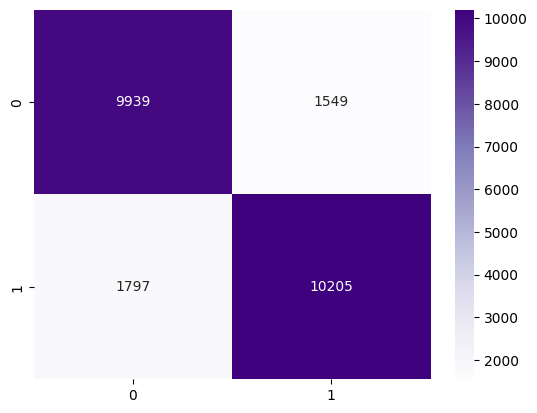

In [41]:
# Check the True & False counts
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Purples')

END

---